# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: 3891013

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
You should give a brief information of this assessment task here.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

from sklearn.datasets import load_files
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk import FreqDist
from pylab import *
from itertools import chain

# import libraries
import numpy as np
import pandas as pd
import re
import os

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.1 Examining and loading data
- xamine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.


In [2]:
# Code to inspect the provided data file...
data = load_files(r"data")
print("Files in data folder:", data['target_names'])

Files in data folder: ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']


In [3]:
print("Number of total data files in the data folder:", shape(data['target'])[0])

Number of total data files in the data folder: 776


In [4]:
test_index = 7

In [5]:
job_description, category, directory = data.data, data.target, data.filenames
print('Job description: ', job_description[test_index])
print('category: ', category[test_index])
print("Belongs to: ", directory[test_index])
#print(f'Job description: {job_description[test_index]}\n\nCorresponding to the label {category[test_index]} inside the {directory[test_index]} directory')

Job description:  b'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Ex

In [6]:
# function to decode
def decode(l):
    if isinstance(l, list):
        return [decode(x) for x in l]
    else:
        return l.decode('utf-8')

# decode the binary description into utf-8 form and save it to full_description
job_description = decode(job_description)

# print out to test
job_description[test_index]

'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of systems

### 1.2 Pre-processing data
Perform the required text pre-processing steps.

...... Sections and code blocks on basic text pre-processing

### Extracting Information from each job description

In [7]:
import re

def extract_description(job_description):
    description = []
    for i in job_description:
        match = re.search(r'Description: (.*?)(?=\nTitle:|\nWebindex:|\nCompany:|$)', str(i), re.DOTALL)
        if match:
            description.append(match.group(1).strip())
        else:
            description.append("NA")
    return description

def extract_title(job_description):
    title = []
    for i in job_description:
        match = re.search(r'Title: (.*?)(?=\nWebindex:|\nCompany:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            title.append(match.group(1).strip())
        else:
            title.append("NA")
    return title

def extract_webindex(job_description):
    webindex = []
    for i in job_description:
        match = re.search(r'Webindex: (.*?)(?=\nTitle:|\nCompany:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            webindex.append(match.group(1).strip())
        else:
            webindex.append("NA")
    return webindex

def extract_company(job_description):
    company_list = []
    for i in job_description:
        match = re.search(r'Company: (.*?)(?=\nTitle:|\nWebindex:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            company_list.append(match.group(1).strip())
        else:
            company_list.append("NA")
    return company_list




description = extract_description(job_description)
company = extract_company(job_description)
webindex = extract_webindex(job_description)
title = extract_title(job_description)
# print(f'Job description at index {test_index}:\n{description[test_index]}\n\n')
# print(f'Job title at index {test_index}:\n{title[test_index]}\n\n')
# print(f'Job webindex at index {test_index}:\n{webindex[test_index]}\n\n')
# print(f'Job company at index {test_index}:\n{company[test_index]}\n'

print("Title: ", title[test_index])
print("")
print("Webindex: ", webindex[test_index])
print("")
print("Company: ", company[test_index])
print("")
print("Description", description[test_index])

Title:  Sales & Purchase Ledger Clerk  Maternity Cover

Webindex:  68684698

Company:  JK Personnel

Description Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of system

### Tokenising Using Pattern and Lower Casing

In [8]:
def tokenizeDescription(raw_description):
    """
        This function first convert all words to lowercases,
        it then segment the raw description into sentences 
        and tokenize each sentences base on the given regex pattern
        and convert the description to a list of tokens.
    """
    description = raw_description.lower() # convert all words to lowercase

    # segment into sentences
    sentences = sent_tokenize(description)

    # tokenize each sentence
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern)
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]

    # merge them into a list of tokens
    tokenised_description = list(chain.from_iterable(token_lists))
    return tokenised_description

# list comprehension, generate a list of tokenized description
tk_description = [tokenizeDescription(r) for r in description] 

# I also want a list of tokenized title for task 3
tk_title = [tokenizeDescription(r) for r in title] 

# I also want a list of tokenized company for task 3
tk_company = [tokenizeDescription(r) for r in company] 

# print out to test
print("Raw description:\n",description[test_index],'\n')

print("Tokenized description:\n",tk_description[test_index],'\n\n')

print("The number of Tokenized description tokens: ",len(tk_description))

Raw description:
 Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of systems and invoicing A good understanding of currencies Computer Literate in office, outlook, word a

In [9]:
def stats_print(tk_description):
    words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(tk_description))
    lens = [len(article) for article in tk_description]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [10]:
stats_print(tk_description)

Vocabulary size:  9834
Total number of tokens:  186952
Lexical diversity:  0.052601737344345076
Total number of reviews: 776
Average review length: 240.91752577319588
Maximun review length: 815
Minimun review length: 13
Standard deviation of review length: 124.97750685071483


### Removing words with length less than 2

In [11]:
# assign variable to see tokenized description has the length less than 2
tk_description_less_length_2 = [[w for w in description if len(w) < 2] for description in tk_description]

# test
print(f'Before removing, the words that appear with length less than 2 at index {test_index}:{tk_description_less_length_2[test_index]}')

# filter out single character tokens
tk_description = [[w for w in description if len(w) >=2] for description in tk_description]

# assign variable to see tokenized description has the length less than 2
tk_description_less_length_2 = [[w for w in description if len(w) < 2] for description in tk_description]

# test
print(f'After removing, the words that appear with length less than 2 at index {test_index}:{tk_description_less_length_2[test_index]}')

Before removing, the words that appear with length less than 2 at index 7:['a', 'a', 'a']
After removing, the words that appear with length less than 2 at index 7:[]


In [12]:
stats_print(tk_description)

Vocabulary size:  9808
Total number of tokens:  180913
Lexical diversity:  0.05421390392066905
Total number of reviews: 776
Average review length: 233.13530927835052
Maximun review length: 795
Minimun review length: 13
Standard deviation of review length: 121.6048654015839


### Removing Stopwords

In [13]:
# remove the stop words inside `stopwords_en.txt` from the tokenized text
stopwords_en = 'stopwords_en.txt'

# read the stop words into a list
with open(stopwords_en, 'r') as f:
    stop_words = f.read().splitlines() 
print(f'The number of stop words inside {stopwords_en} file is {len(stop_words)} \n These Words are as follows:- \n{stop_words}')

The number of stop words inside stopwords_en.txt file is 571 
 These Words are as follows:- 
['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'com

In [14]:
# print the test_index index description length before removing stop words
print("The number of tokens in the test_index index description BEFORE removing stop words:",len(tk_description[test_index]))

# convert stop words list into a set to speed up the process to checking
stopwordSet = set(stop_words)

# filter stop words in each document for the whole tokenized description
tk_description = [[token for token in description if token not in stopwordSet] for description in tk_description]

# print the test_index index description length after removing stop words
print("The number of tokens in the test_index index description AFTER removing stop words:",len(tk_description[test_index]))

# few statistic
stats_print(tk_description)

The number of tokens in the test_index index description BEFORE removing stop words: 186
The number of tokens in the test_index index description AFTER removing stop words: 118
Vocabulary size:  9404
Total number of tokens:  107161
Lexical diversity:  0.0877558066834016
Total number of reviews: 776
Average review length: 138.09407216494844
Maximun review length: 487
Minimun review length: 12
Standard deviation of review length: 73.07847897002313


### Removing the words that appear only once in the document

In [15]:
words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
term_fd = FreqDist(words) # compute term frequency for each unique word/type

# Using hapaxes() to see less frequent words in term frequency
lessFreqWords = set(term_fd.hapaxes())
print(f'The number of words that appear only once in the entire corpus is: {len(lessFreqWords)}\n')

# test
lessFreqWords

with open('test.txt', 'w') as file:
    for i in lessFreqWords:
        file.write(f"{i}\n")


The number of words that appear only once in the entire corpus is: 4186



In [16]:
tk_description = [[token for token in description if token not in lessFreqWords] for description in tk_description]

In [17]:
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of reviews: 776
Average review length: 132.69974226804123
Maximun review length: 471
Minimun review length: 12
Standard deviation of review length: 70.3782402519735


### Removing the top 50 most frequent words based on document frequency

In [18]:
mostFreqWords = list(chain.from_iterable([set(desc) for desc in tk_description]))
doc_fd = FreqDist(mostFreqWords)  # compute document frequency for each unique word/type
top_50_freq_words = doc_fd.most_common(50)
top_50_freq_words_dict = dict(top_50_freq_words)
top_50_freq_words

[('experience', 586),
 ('role', 499),
 ('work', 453),
 ('team', 431),
 ('working', 407),
 ('skills', 366),
 ('client', 358),
 ('job', 348),
 ('company', 343),
 ('business', 342),
 ('uk', 316),
 ('excellent', 309),
 ('management', 301),
 ('based', 287),
 ('apply', 286),
 ('opportunity', 280),
 ('salary', 270),
 ('required', 269),
 ('successful', 267),
 ('support', 261),
 ('join', 252),
 ('candidate', 248),
 ('service', 242),
 ('knowledge', 241),
 ('development', 235),
 ('leading', 234),
 ('high', 224),
 ('cv', 223),
 ('www', 220),
 ('manager', 220),
 ('training', 214),
 ('sales', 211),
 ('strong', 211),
 ('provide', 209),
 ('including', 209),
 ('services', 208),
 ('ability', 201),
 ('contact', 200),
 ('position', 199),
 ('recruitment', 196),
 ('full', 194),
 ('benefits', 193),
 ('posted', 192),
 ('originally', 191),
 ('jobseeking', 191),
 ('clients', 187),
 ('include', 187),
 ('good', 187),
 ('essential', 186),
 ('information', 184)]

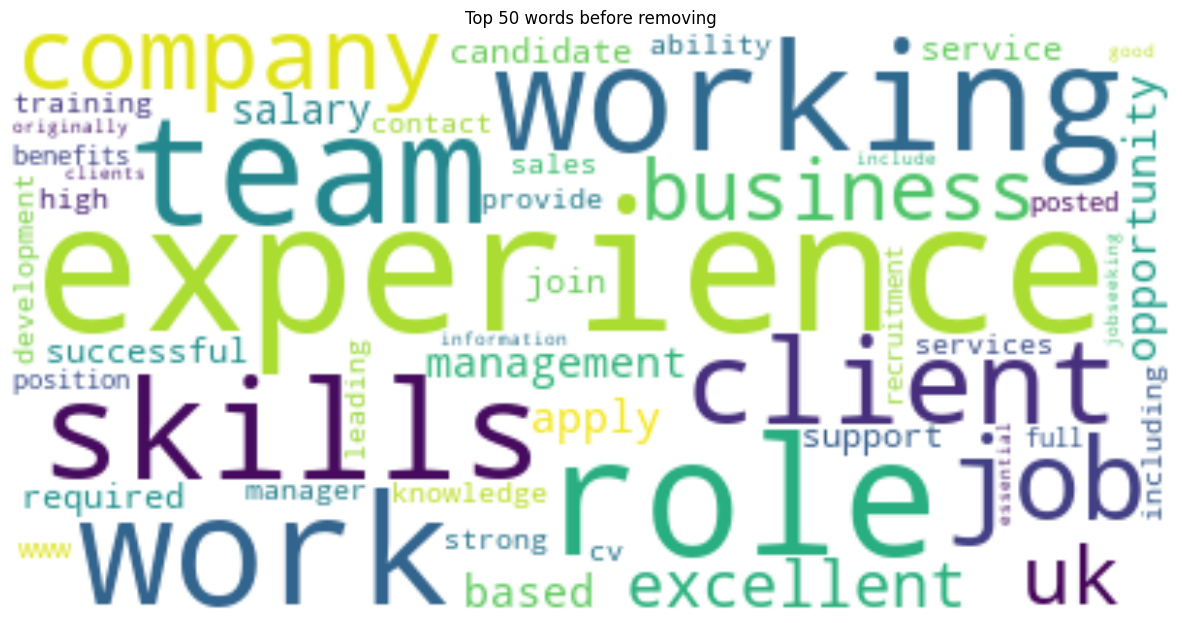

In [19]:
wordcloud = WordCloud(width = 400, height = 200, background_color ='white').generate_from_frequencies(top_50_freq_words_dict)
# Plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 words before removing")
plt.show()

In [20]:
tk_description = [[token for token in description if token not in top_50_freq_words_dict] for description in tk_description]

In [21]:
stats_print(tk_description)

Vocabulary size:  5168
Total number of tokens:  81205
Lexical diversity:  0.06364140139153993
Total number of reviews: 776
Average review length: 104.64561855670104
Maximun review length: 401
Minimun review length: 7
Standard deviation of review length: 58.44628718710534


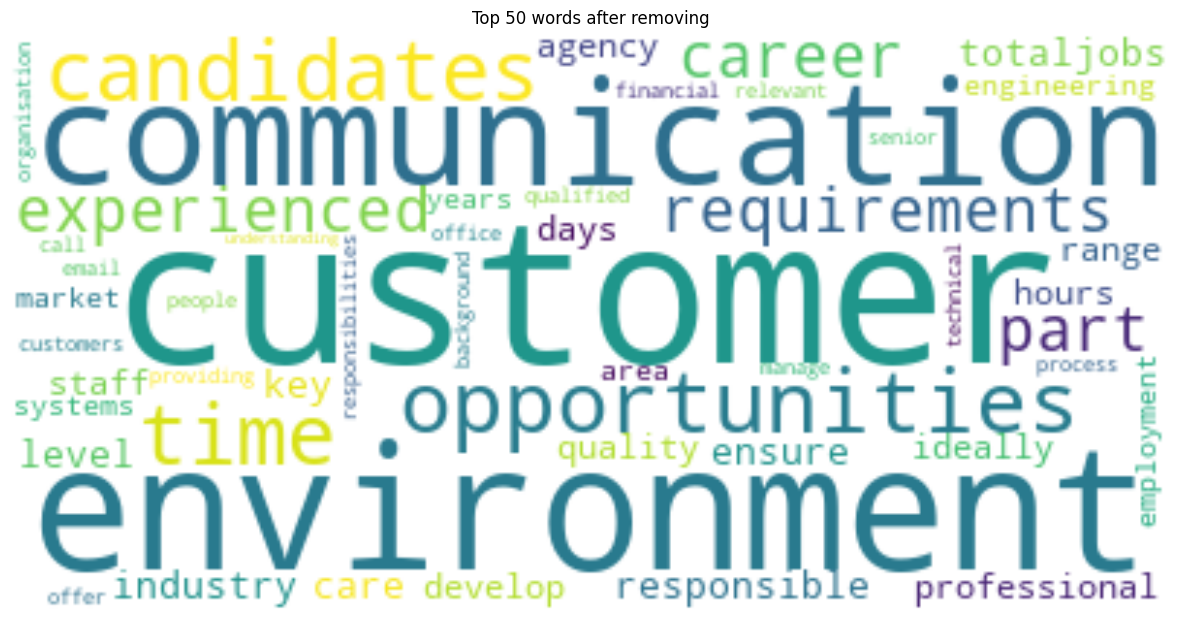

[('customer', 182),
 ('environment', 182),
 ('communication', 181),
 ('opportunities', 181),
 ('candidates', 179),
 ('time', 176),
 ('requirements', 172),
 ('experienced', 172),
 ('career', 172),
 ('part', 171),
 ('responsible', 171),
 ('ensure', 169),
 ('key', 169),
 ('care', 168),
 ('level', 166),
 ('totaljobs', 165),
 ('industry', 162),
 ('professional', 156),
 ('ideally', 156),
 ('staff', 151),
 ('days', 150),
 ('quality', 150),
 ('develop', 148),
 ('range', 148),
 ('hours', 147),
 ('agency', 145),
 ('engineering', 144),
 ('employment', 142),
 ('systems', 142),
 ('market', 142),
 ('years', 141),
 ('area', 140),
 ('qualified', 137),
 ('financial', 135),
 ('people', 135),
 ('email', 134),
 ('office', 133),
 ('call', 132),
 ('process', 132),
 ('offer', 128),
 ('customers', 128),
 ('senior', 127),
 ('organisation', 127),
 ('providing', 127),
 ('relevant', 126),
 ('responsibilities', 126),
 ('manage', 125),
 ('technical', 124),
 ('background', 123),
 ('understanding', 122)]

In [22]:

mostFreqWordsUpdated = list(chain.from_iterable([set(desc) for desc in tk_description]))
doc_fd = FreqDist(mostFreqWordsUpdated)  # compute document frequency for each unique word/type
top_50_freq_words_updated = doc_fd.most_common(50)
top_50_freq_words_updated_dict = dict(top_50_freq_words_updated)

wordcloud = WordCloud(width = 400, height = 200, background_color ='white').generate_from_frequencies(top_50_freq_words_updated_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 words after removing")
plt.show()
(top_50_freq_words_updated)

## Saving required outputs
Save the vocabulary, bigrams and job advertisment txt as per spectification.
- vocab.txt

### Saving pre-processed reviews

In [23]:
def save_descriptions(Filename,tk_description):
    out_file = open(Filename, 'w') # creates a txt file and open to save the reviews
    string = "\n".join([" ".join(review) for review in tk_description])
    out_file.write(string)
    out_file.close() # close the file
    
def save_categories(categoryFilename,category):
    out_file = open(categoryFilename, 'w') # creates a txt file and open to save sentiments
    string = "\n".join([str(s) for s in category])
    out_file.write(string)
    out_file.close() # close the file  

def save_title(titleFilename,title):
    out_file = open(titleFilename, 'w') # creates a txt file and open to save title
    string = "\n".join([str(s) for s in title])
    out_file.write(string)
    out_file.close() # close the file

In [24]:
save_descriptions('description.txt',tk_description)

In [25]:
save_categories('categories.txt',category)

In [26]:
save_categories('title.txt',title)

In [27]:
print(data.data[test_index]) # an example of a sentiment txt
print(tk_description[test_index]) # an example of the pre-process sentiment text
all(data.target==category) # validate whether we save the sentiment properly

b'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of system

True

### Building a vocabulary of the cleaned job advertisement descriptions

In [28]:
def generate_vocab(words_list, filename):
    with open(filename, 'w') as f:  # creates a txt file open in write mode
        for i, word in enumerate(words_list):
            # write each index and vocabulary word, note that index start from 0
            f.write(word + ':' + str(i) + '\n')

In [29]:
# convert tokenized description into a alphabetically sorted list
vocab = sorted(list(set(chain.from_iterable(tk_description))))

# save the sorted vocabulary list into a file according to the required format
generate_vocab(vocab, 'vocab.txt')


# print out the first 10 words in the vocabulary to test
print(vocab[:10])

['aap', 'aaron', 'aat', 'abb', 'abenefit', 'aberdeen', 'abi', 'abilities', 'abreast', 'abroad']


**We will also create a CSV file to store 'Title', 'Webindex', 'Company','Description','Tokenized Description' and 'Category'**

In [30]:
jobs_data = pd.DataFrame({'Webindex': webindex, 'Title': title, 'Company': company, 'Description': description,'Tokenized Description': tk_description, 'Category': category})

# updated column Tokenized Description
jobs_data['Tokenized Description'] = jobs_data['Tokenized Description']

# updated column & replace the value in Category 
jobs_data['Category'] = jobs_data['Category'].replace([0,1,2,3],['Accounting_Finance','Engineering','Healthcare_Nursing','Sales'])

# updated column & cast Webindex to int
jobs_data['Webindex'] = jobs_data['Webindex'].astype(int)

# save job ad to csv file
jobs_data.to_csv('jobs_data.csv', index=False)

# print basic info about the job_ad data frame
print(jobs_data.info())

# print first 5 rows
jobs_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Webindex               776 non-null    int64 
 1   Title                  776 non-null    object
 2   Company                776 non-null    object
 3   Description            776 non-null    object
 4   Tokenized Description  776 non-null    object
 5   Category               776 non-null    object
dtypes: int64(1), object(5)
memory usage: 36.5+ KB
None


,Webindex,Title,Company,Description,Tokenized Description,Category
0,68997528,Finance / Accounts Asst Bromley to ****k,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,"[accountant, partqualified, south, east, londo...",Accounting_Finance
1,68063513,Fund Accountant Hedge Fund,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,"[hedge, funds, london, recruiting, fund, accou...",Accounting_Finance
2,68700336,Deputy Home Manager,Caritas,An exciting opportunity has arisen to join an ...,"[exciting, arisen, establish, provider, elderl...",Healthcare_Nursing
3,67996688,Brokers Wanted Imediate Start,OneTwoTrade,OneTwoTrade is expanding their Sales Team and ...,"[expanding, recruiting, junior, trainee, broke...",Accounting_Finance
4,71803987,RGN Nurses (Hospitals) Penarth,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and ...,"[rgn, nurses, hospitals, fulltime, part, swiis...",Healthcare_Nursing


verifying the if the data is correctly saved in the df

In [42]:
print(tk_description[test_index])
print(description[test_index])
print(category[test_index])
print(webindex[test_index])
jobs_data[jobs_data['Webindex'] == int(webindex[test_index])]

['recruit', 'experienced', 'purchase', 'ledger', 'clerk', 'covering', 'maternity', 'february', 'mid', 'year', 'ideal', 'immediately', 'duties', 'responsibilities', 'limited', 'ledger', 'input', 'cheques', 'bacs', 'received', 'sage', 'accurately', 'reconcile', 'actual', 'receipts', 'prepare', 'banking', 'book', 'responsible', 'ensure', 'credit', 'control', 'professional', 'timely', 'manner', 'send', 'customer', 'statements', 'monthly', 'basis', 'managing', 'aged', 'debtors', 'report', 'purchase', 'ledger', 'prepare', 'payment', 'run', 'ensuring', 'invoices', 'due', 'processed', 'log', 'payments', 'sage', 'cheques', 'bacs', 'deal', 'account', 'payable', 'queries', 'managing', 'aged', 'creditors', 'report', 'requirements', 'years', 'systems', 'invoicing', 'understanding', 'computer', 'literate', 'office', 'outlook', 'word', 'excel', 'sage', 'preferred', 'minimum', 'sage', 'tight', 'deadlines', 'errors', 'numeracy', 'communication', 'organised', 'efficient', 'attention', 'detail', 'totaljo

,Webindex,Title,Company,Description,Tokenized Description,Category
7,68684698,Sales & Purchase Ledger Clerk Maternity Cover,JK Personnel,Our client is looking to recruit an experience...,"['recruit', 'experienced', 'purchase', 'ledger...",Accounting_Finance


As we can see, it matches with actual output and output from df.

## Summary
Give a short summary and anything you would like to talk about the assessment task here.

## Couple of notes for all code blocks in this notebook
- please provide proper comment on your code
- Please re-start and run all cells to make sure codes are runable and include your output in the submission.   
<span style="color: red"> This markdown block can be removed once the task is completed. </span>